# Tarea 7.3

Ejercicio 2.1.15 del libro de Burden.

Un abrevadero (contenedor de agua para dar de beber a los animales) es mitad de un cilindro. Tiene una sección transversal a forma de semi-círculo de radio $r = 48.934$ cm y una longitud $L = 1.3245$ m. Si el volumen del agua contenido es de $10.013$ litros, encuentre la profundidad del agua en metros con una precisión de cinco cifras decimales. (Para lograrlo, primero use algunas iteraciones del método de bisección y así obtener un par de puntos iniciales para el método de Newton.).

## Solución

Si vemos el abrevadero con un corte:

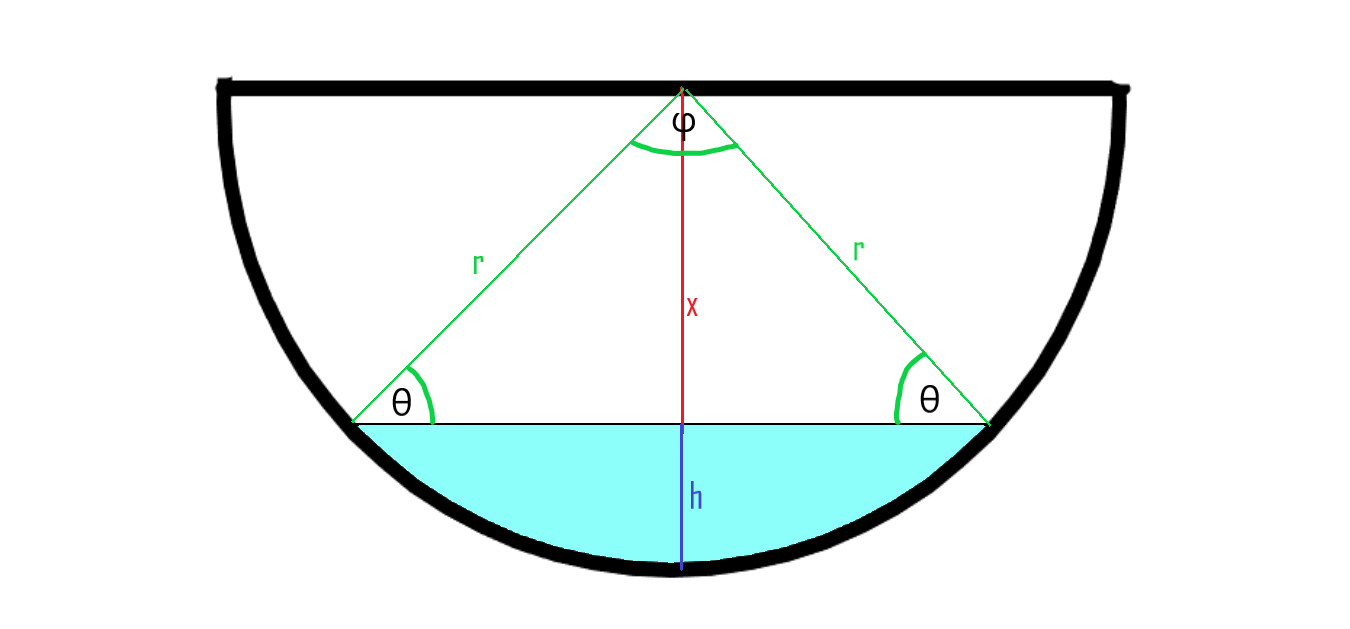

De la imagen podemos extraer que:
$$
\varphi=\pi-2\theta
$$


$$
sin(\theta)=\frac{x}{r}\quad \text{por lo que} \quad \theta=arcsin\left(\frac{x}{r}\right)
$$

Por lo que podemos escribir $ \varphi $ como:

$$
\varphi=\pi-2\arcsin\left(\frac{x}{r}\right)
$$

El área de un segmento circular está dada por: 
$$
A=\frac{r^2}{2}\left(\varphi-sin\left(\varphi\right)\right)
$$

Entonces podemos escribir el área del segmento circular en función de su radio y de la distancia $x$:

$$
A=\frac{r^2}{2}\left(\pi-2\arcsin\left(\frac{x}{r}\right)-sin\left(\pi-2\arcsin\left(\frac{x}{r}\right)\right)\right)
$$
 
El volumen de agua que contenga el abrevadero será:  
$$
V=L\left(\frac{r^2}{2}\left(\pi-2\arcsin\left(\frac{x}{r}\right)-sin\left(2\arcsin\left(\frac{x}{r}\right)\right)\right)\right)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Variables en metros:
#Longitud.
l = 1.3245
#Radio en metros.
r = 0.48934
#Volumen en metros cúbicos.
v = 0.010013

Por algún motivo el código me da error cundo defino la función del problema como:
$$
L\left(\frac{r^2}{2}\left(\pi-2\arcsin\left(\frac{x}{r}\right)-sin\left(2\arcsin\left(\frac{x}{r}\right)\right)\right)\right)-V
$$
Por lo que intente reducirla un poco
$$
k1=\frac{r^2}{2}\left(\pi-2\arcsin\left(\frac{x}{r}\right)-sin\left(2\arcsin\left(\frac{x}{r}\right)\right)\right) \quad \text{con } \quad k1=\frac{V}{L}
$$

$$
k3=k1-k2=-r^2\arcsin\left(\frac{x}{r}\right)-\frac{r^2}{2}sin\left(2\arcsin\left(\frac{x}{r}\right)\right) \quad \text{con } \quad k2=\frac{r^2\pi}{2}
$$

$$
0=-\arcsin\left(\frac{x}{r}\right)-\frac{1}{2}sin\left(2\arcsin\left(\frac{x}{r}\right)\right)-k4 \quad \text{con } \quad k4=\frac{k3}{r^2}
$$

Por lo que intente reducirla un poco Bueno, no se redujo mucho, pero al menos funciona en el código.

La derivada de la expresión anterior es:


$$
\frac{-1-\cos \left(2\arcsin \left(\frac{x}{y}\right)\right)}{\sqrt{-x^2+y^2}}
$$

In [3]:
#Generamos las constantes anteriores.
k1 = v/l
k2 = 0.5*np.pi*r**2
k3 = k1-k2
k4 = k3/(r**2)

In [4]:
#Definimos la función a la cual queremos encontrarle el cero.
def f(x):
    return ((-np.arcsin(x/r))-(np.sin(2*(np.arcsin(x/r))))/2)-k4

In [5]:
#Definimos la derivada de la función anterior.
def df(x):
    return (-1-np.cos(2*(np.arcsin(x/r))))/(np.sqrt((r**2)-(x**2)))

<ipython-input-4-cad9af2dbb88>:3: RuntimeWarning: invalid value encountered in arcsin
  return ((-np.arcsin(x/r))-(np.sin(2*(np.arcsin(x/r))))/2)-k4


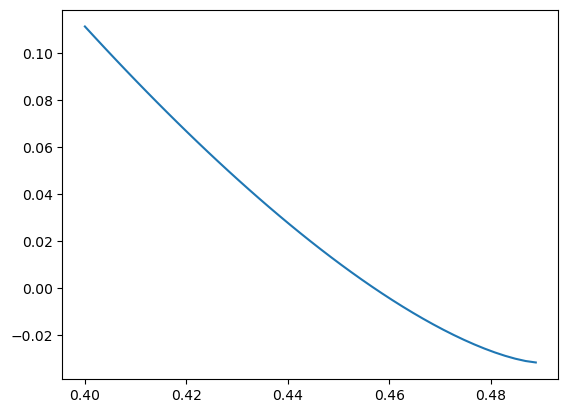

In [6]:
#Graficamos la función jugando con el dominio de esta para encontrar un intervalo donde veamos el cero.
x = np.linspace(0.4,0.6,100)
plt.plot(x, f(x))
plt.show()

In [7]:
class MaxIterations(Exception):
    pass

In [8]:
#Buscamos un punto cercano al cero con algunas iteraciones del método de bisección.
def biseccion(f, a, b, epsilon, N=4):
    
    for i in range(N):
        p = a + (b - a)/2
        print(p)
        if abs(f(p)) < epsilon:
            print("Cero en", p, "encontrado después de", i, "iteraciones.")
            return p
        elif f(p)*f(a) > 0:
            a = p
        else:
            b = p
    print("No se encontró el cero después de", N, "iteraciones.")
    
biseccion(f, 0.4, 0.6, 0.00001)    

0.5
0.45
0.475
0.4625
No se encontró el cero después de 4 iteraciones.


<ipython-input-4-cad9af2dbb88>:3: RuntimeWarning: invalid value encountered in arcsin
  return ((-np.arcsin(x/r))-(np.sin(2*(np.arcsin(x/r))))/2)-k4


In [9]:
#Con el punto obtenido en el método de bisección, buscamos el cero con del método de Newton.
def newton(f, df, po, epsilon, N=1000000):
    
    for i in range(N):
        p = po - f(po)/df(po)
        print(p)
        if abs(p - po)/abs(p) < epsilon:
            print("Cero en", p, "encontrado después de", i, "iteraciones.")
            return p, i+1
        po = p
    
    raise MaxIterations("No se encontró el cero luego de", N, "iteraciones.")
    
    
newton(f, df, 0.4625 , 0.00000001)  

0.4568450463784726
0.4570995265925244
0.4571000102447429
0.45710001024649505
Cero en 0.45710001024649505 encontrado después de 3 iteraciones.


(0.45710001024649505, 4)

In [10]:
#Para comprobar evaluamos la función en el punto encontrado.
f(0.45710001024649505)

0.0

Finalmente por como está planteado el problema, la profundidad del agua está dada por:

$$
h=r-x
$$

In [11]:
#La altura del agua en metros es:
r-0.45710001024649505

0.03223998975350495